In [1]:
!pip -q install ultralytics
from ultralytics import YOLO


In [2]:
# Install gdown if it's not already installed
!pip install gdown



In [3]:
# Import gdown
import gdown

# dataset for plates detection only
plates_detection = 'https://drive.google.com/uc?id=1ptlniGxVzGcpC_DZS-m4e6KhTVCjyKvd'

# saudi plates without cars, plates only for reading plate numbers
saudi_plates = 'https://drive.google.com/uc?id=1JXqBsTCDJrwM_fg4tO8wWL0GQk3mW5t4'
# saudi plates within cars for fine tuning to saudi plates
Saudi_PlatesNcars = 'https://drive.google.com/uc?id=1EOk9nQQjN0g7DbtlgM2lDPco3ANFlweU'

# Download the zip files
gdown.download(plates_detection, 'plates_detection.zip', quiet=False)
gdown.download(saudi_plates, 'saudi_plates.zip', quiet=False)
gdown.download(Saudi_PlatesNcars, 'Saudi_PlatesNcars.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ptlniGxVzGcpC_DZS-m4e6KhTVCjyKvd
From (redirected): https://drive.google.com/uc?id=1ptlniGxVzGcpC_DZS-m4e6KhTVCjyKvd&confirm=t&uuid=826ec5bc-9c17-454c-935f-10e4269ba2e5
To: /content/plates_detection.zip
100%|██████████| 451M/451M [00:09<00:00, 48.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JXqBsTCDJrwM_fg4tO8wWL0GQk3mW5t4
To: /content/saudi_plates.zip
100%|██████████| 9.74M/9.74M [00:00<00:00, 11.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1EOk9nQQjN0g7DbtlgM2lDPco3ANFlweU
From (redirected): https://drive.google.com/uc?id=1EOk9nQQjN0g7DbtlgM2lDPco3ANFlweU&confirm=t&uuid=2dea773e-ba6c-4e06-8aef-fbddff8ba992
To: /content/Saudi_PlatesNcars.zip
100%|██████████| 36.8M/36.8M [00:00<00:00, 55.5MB/s]


'Saudi_PlatesNcars.zip'

In [4]:
import os, zipfile

def unzip(zip_path, out_dir):
    os.makedirs(out_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(out_dir)

base = "/content/datasets"
unzip("plates_detection.zip", f"{base}/plates_detection")
unzip("saudi_plates.zip", f"{base}/saudi_plates")
unzip("Saudi_PlatesNcars.zip", f"{base}/saudi_cars")

print("Done. Top-level folders:")
!ls -la /content/datasets

Done. Top-level folders:
total 20
drwxr-xr-x 5 root root 4096 Dec 19 12:26 .
drwxr-xr-x 1 root root 4096 Dec 19 12:34 ..
drwxr-xr-x 5 root root 4096 Dec 19 12:26 plates_detection
drwxr-xr-x 5 root root 4096 Dec 19 12:26 saudi_cars
drwxr-xr-x 5 root root 4096 Dec 19 12:26 saudi_plates


In [5]:
!find /content/datasets -maxdepth 3 -type d | sed -e 's;[^/]*/;  ;g'

    datasets
      saudi_plates
        train
          labels
          images
        valid
          labels
          images
        test
          labels
          images
      plates_detection
        train
          labels
          images
        valid
          labels
          images
        test
          labels
          images
      saudi_cars
        train
          labels
          images
        valid
          labels
          images
        test
          labels
          images


In [6]:
import glob

def count_imgs(path):
    return len(glob.glob(path + "/*"))

print("Base detection test images:",
      count_imgs("/content/datasets/plates_detection/test/images"))

print("Saudi cars test images:",
      count_imgs("/content/datasets/saudi_cars/test/images"))

print("Saudi plates-only images (for OCR):",
      count_imgs("/content/datasets/saudi_plates/test/images"))


Base detection test images: 226
Saudi cars test images: 41
Saudi plates-only images (for OCR): 42


In [7]:
!ls -la /content/datasets/plates_detection
!cat /content/datasets/plates_detection/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 19 12:26 .
drwxr-xr-x 5 root root 4096 Dec 19 12:26 ..
-rw-r--r-- 1 root root  303 Dec 19 12:34 data.yaml
-rw-r--r-- 1 root root  157 Dec 19 12:34 README.dataset.txt
-rw-r--r-- 1 root root 1475 Dec 19 12:34 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 19 12:26 test
drwxr-xr-x 4 root root 4096 Dec 19 12:26 train
drwxr-xr-x 4 root root 4096 Dec 19 12:26 valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['LicensePlate']

roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2

In [8]:
!ls -la /content/datasets/saudi_cars
!cat /content/datasets/saudi_cars/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 19 12:26 .
drwxr-xr-x 5 root root 4096 Dec 19 12:26 ..
-rw-r--r-- 1 root root  320 Dec 19 12:35 data.yaml
-rw-r--r-- 1 root root  178 Dec 19 12:35 README.dataset.txt
-rw-r--r-- 1 root root 1106 Dec 19 12:35 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 19 12:26 test
drwxr-xr-x 4 root root 4096 Dec 19 12:26 train
drwxr-xr-x 4 root root 4096 Dec 19 12:26 valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Number-Plate', 'Plate']

roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1

In [9]:
# clean saudi dataset from plat numbers we only need plates
from pathlib import Path

labels_dir = Path("/content/datasets/saudi_cars/train/labels")

for txt_file in labels_dir.glob("*.txt"):
    new_lines = []
    with open(txt_file, "r") as f:
        for line in f:
            cls, *coords = line.strip().split()
            if cls == "1":          # Plate
                new_lines.append("0 " + " ".join(coords))  # remap to 0
            # cls == "0" (Number-Plate) → dropped

    with open(txt_file, "w") as f:
        f.write("\n".join(new_lines))


In [10]:
# clean saudi dataset from plat numbers we only need plates
from pathlib import Path

labels_dir = Path("/content/datasets/saudi_cars/test/labels")

for txt_file in labels_dir.glob("*.txt"):
    new_lines = []
    with open(txt_file, "r") as f:
        for line in f:
            cls, *coords = line.strip().split()
            if cls == "1":          # Plate
                new_lines.append("0 " + " ".join(coords))  # remap to 0
            # cls == "0" (Number-Plate) → dropped

    with open(txt_file, "w") as f:
        f.write("\n".join(new_lines))

In [11]:
# clean saudi dataset from plat numbers we only need plates
from pathlib import Path

labels_dir = Path("/content/datasets/saudi_cars/valid/labels")

for txt_file in labels_dir.glob("*.txt"):
    new_lines = []
    with open(txt_file, "r") as f:
        for line in f:
            cls, *coords = line.strip().split()
            if cls == "1":          # Plate
                new_lines.append("0 " + " ".join(coords))  # remap to 0
            # cls == "0" (Number-Plate) → dropped

    with open(txt_file, "w") as f:
        f.write("\n".join(new_lines))

In [14]:
import yaml

def fix_yaml(yaml_path, nc, names):
    with open(yaml_path, "r") as f:
        d = yaml.safe_load(f)

    d["train"] = "train/images"
    d["val"]   = "valid/images"
    d["test"]  = "test/images"
    d["nc"]    = nc
    d["names"] = names

    # keep roboflow metadata if present
    with open(yaml_path, "w") as f:
        yaml.safe_dump(d, f, sort_keys=False)

# plates_detection: keep 1 class
fix_yaml("/content/datasets/plates_detection/data.yaml", 1, ["LicensePlate"])

# saudi_cars: we will also make it 1 class later (after merging labels)
#fix_yaml("/content/datasets/saudi_cars/data.yaml", 1, ["LicensePlate"])
fix_yaml(
    "/content/datasets/saudi_cars/data.yaml",
    nc=1,
    names=["LicensePlate"]
)

print("✅ YAML files updated.")
!cat /content/datasets/plates_detection/data.yaml
print("------")
!cat /content/datasets/saudi_cars/data.yaml


✅ YAML files updated.
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2
------
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1


In [15]:
!ls -la /content/datasets/plates_detection
!cat /content/datasets/plates_detection/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 19 12:26 .
drwxr-xr-x 5 root root 4096 Dec 19 12:26 ..
-rw-r--r-- 1 root root  291 Dec 19 12:44 data.yaml
-rw-r--r-- 1 root root  157 Dec 19 12:34 README.dataset.txt
-rw-r--r-- 1 root root 1475 Dec 19 12:34 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 19 12:26 test
drwxr-xr-x 4 root root 4096 Dec 19 12:26 train
drwxr-xr-x 4 root root 4096 Dec 19 12:26 valid
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2


In [16]:
!ls -la /content/datasets/saudi_cars
!cat /content/datasets/saudi_cars/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Dec 19 12:26 .
drwxr-xr-x 5 root root 4096 Dec 19 12:26 ..
-rw-r--r-- 1 root root  299 Dec 19 12:44 data.yaml
-rw-r--r-- 1 root root  178 Dec 19 12:35 README.dataset.txt
-rw-r--r-- 1 root root 1106 Dec 19 12:35 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Dec 19 12:26 test
drwxr-xr-x 4 root root 4096 Dec 19 12:26 train
drwxr-xr-x 4 root root 4096 Dec 19 12:26 valid
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1


In [17]:
!cat /content/datasets/saudi_cars/train/labels/*.txt | head

0 0.00209265625 0.9936769390625001 0.9947821671874999 0.9901044812500001 0.9892856734375 0.00044642187500000004 0.0074489484375 0.00766344375 0.00209265625 0.99367693906250010 0.9892856734375 0.00044642187500000004 0.0074489484375 0.00766344375 0.00209265625 0.9936769390625001 0.9947821671874999 0.9901044812500001 0.9892856734375 0.000446421875000000040 0.00209265625 0.9936769390625001 0.9947821671874999 0.9901044812500001 0.9892856734375 0.00044642187500000004 0.0074489484375 0.00766344375 0.00209265625 0.99367693906250010 0.0288738484375 0.0630373671875 0.019946784375000002 0.9954633046874999 0.968000975 0.95616558125 0.90892853125 0.0808035640625 0.0288738484375 0.06303736718750 0.968000975 0.95616558125 0.90892853125 0.0808035640625 0.0288738484375 0.0630373671875 0.019946784375000002 0.9954633046874999 0.968000975 0.956165581250 0.0288738484375 0.0630373671875 0.019946784375000002 0.9954633046874999 0.968000975 0.95616558125 0.90892853125 0.0808035640625 0.0288738484375 0.06303736

In [18]:
import glob
print("plates_detection test images:", len(glob.glob("/content/datasets/plates_detection/test/images/*")))
print("saudi_cars test images:", len(glob.glob("/content/datasets/saudi_cars/test/images/*")))


plates_detection test images: 226
saudi_cars test images: 41


In [19]:
import os, glob

sample = glob.glob("/content/datasets/saudi_cars/train/labels/*.txt")[:3]
print("Sample label files:", sample)

for p in sample:
    print("\nFILE:", os.path.basename(p))
    !head -n 5 "$p"


Sample label files: ['/content/datasets/saudi_cars/train/labels/car99_jpg.rf.ecdc1150a4b85666bcf203bd9591da17.txt', '/content/datasets/saudi_cars/train/labels/car128_webp_jpg.rf.eb583c15614d2b8ce809508dfe7e5fae.txt', '/content/datasets/saudi_cars/train/labels/ckie7pj5t0066246adcswvogc_jpeg.rf.b0668e3ca5d98cc6d57c091f560dae13.txt']

FILE: car99_jpg.rf.ecdc1150a4b85666bcf203bd9591da17.txt
0 0.0074489484375 0.016594726562500002 0.009234334375 0.9954633046874999 0.9965676890624999 0.997249534375 0.9937499593749999 0.0116071359375 0.0074489484375 0.016594726562500002
FILE: car128_webp_jpg.rf.eb583c15614d2b8ce809508dfe7e5fae.txt
0 0.7805326265625 0.609631875 0.8107142453125 0.35535713593749996 0.039586434375 0.4131436671875 0.09136329843749999 0.636425721875 0.7805326265625 0.609631875
FILE: ckie7pj5t0066246adcswvogc_jpeg.rf.b0668e3ca5d98cc6d57c091f560dae13.txt
0 0.4984375 0.515625 0.9109375 0.48125

In [20]:
sample = glob.glob("/content/datasets/plates_detection/train/labels/*.txt")[:3]
print("Sample label files:", sample)

for p in sample:
    print("\nFILE:", os.path.basename(p))
    !head -n 5 "$p"

Sample label files: ['/content/datasets/plates_detection/train/labels/3ajnb28ju8ha1_jpg.rf.866ad3467a89866f3e77f4c12f7ad14a.txt', '/content/datasets/plates_detection/train/labels/b-yRIwkM0VqCfp1-xVypTfqD8aOnDn0OIybZalLFrjY_jpg.rf.6c19278139cc18902b67a1a1c6468ccc.txt', '/content/datasets/plates_detection/train/labels/dyqreypgc1pa1_jpg.rf.fd19bff98eed06250627cae8bcd600da.txt']

FILE: 3ajnb28ju8ha1_jpg.rf.866ad3467a89866f3e77f4c12f7ad14a.txt
0 0.4731928359375 0.6390032734375 0.6982089546875 0.6009288984375 0.6988951203125 0.597123071875 0.6993846921875 0.491824665625 0.4632285140625 0.5290524578125 0.467789478125 0.638332325 0.4731928359375 0.6390032734375
FILE: b-yRIwkM0VqCfp1-xVypTfqD8aOnDn0OIybZalLFrjY_jpg.rf.6c19278139cc18902b67a1a1c6468ccc.txt
0 0.377918846875 0.5808656015625 0.40062615937499996 0.5097510875 0.40079359062500003 0.505652034375 0.3130013453125 0.45339902812500005 0.28821582968750004 0.5257072484374999 0.3754152125 0.5807055531249999 0.377918846875 0.5808656015625
FILE:

In [21]:
import glob

label_files = glob.glob("/content/datasets/saudi_cars/*/labels/*.txt")

kept, removed = 0, 0

for lf in label_files:
    with open(lf, "r") as f:
        lines = [ln.strip() for ln in f.read().splitlines() if ln.strip()]

    new_lines = []
    for ln in lines:
        parts = ln.split()
        # Keep only bbox format: class + 4 numbers
        if len(parts) == 5:
            new_lines.append(ln)
            kept += 1
        else:
            removed += 1

    with open(lf, "w") as f:
        f.write("\n".join(new_lines) + ("\n" if new_lines else ""))

print(f"✅ Cleaned labels. Kept bbox lines: {kept}, Removed segmentation lines: {removed}")


✅ Cleaned labels. Kept bbox lines: 487, Removed segmentation lines: 481


In [22]:
import os, glob

sample = glob.glob("/content/datasets/saudi_cars/train/labels/*.txt")[:3]
for p in sample:
    print("\nFILE:", os.path.basename(p))
    !cat "$p"



FILE: car99_jpg.rf.ecdc1150a4b85666bcf203bd9591da17.txt

FILE: car128_webp_jpg.rf.eb583c15614d2b8ce809508dfe7e5fae.txt

FILE: ckie7pj5t0066246adcswvogc_jpeg.rf.b0668e3ca5d98cc6d57c091f560dae13.txt
0 0.4984375 0.515625 0.9109375 0.48125


In [23]:
import glob

label_files = glob.glob("/content/datasets/plates_detection/*/labels/*.txt")

kept, removed = 0, 0

for lf in label_files:
    with open(lf, "r") as f:
        lines = [ln.strip() for ln in f.read().splitlines() if ln.strip()]

    new_lines = []
    for ln in lines:
        parts = ln.split()
        if len(parts) == 5:       # bbox format only
            new_lines.append(ln)
            kept += 1
        else:                     # segmentation polygon -> remove
            removed += 1

    with open(lf, "w") as f:
        f.write("\n".join(new_lines) + ("\n" if new_lines else ""))

print(f"✅ plates_detection cleaned. Kept bbox lines: {kept}, Removed seg lines: {removed}")


✅ plates_detection cleaned. Kept bbox lines: 4220, Removed seg lines: 3167


In [24]:
import os, glob
sample = glob.glob("/content/datasets/plates_detection/train/labels/*.txt")[:3]

for p in sample:
    print("\nFILE:", os.path.basename(p))
    !cat "$p"



FILE: 3ajnb28ju8ha1_jpg.rf.866ad3467a89866f3e77f4c12f7ad14a.txt

FILE: b-yRIwkM0VqCfp1-xVypTfqD8aOnDn0OIybZalLFrjY_jpg.rf.6c19278139cc18902b67a1a1c6468ccc.txt

FILE: dyqreypgc1pa1_jpg.rf.fd19bff98eed06250627cae8bcd600da.txt


In [25]:
import glob, os

label_files = glob.glob("/content/datasets/plates_detection/*/labels/*.txt")
empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("plates_detection labels total:", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)

plates_detection labels total: 5566
Empty: 2381
Empty %: 42.78


In [26]:
import glob, os

splits = ["train", "valid", "test"]
removed = 0
missing_img = 0

for sp in splits:
    lbl_dir = f"/content/datasets/plates_detection/{sp}/labels"
    img_dir = f"/content/datasets/plates_detection/{sp}/images"

    for lf in glob.glob(lbl_dir + "/*.txt"):
        if os.path.getsize(lf) == 0:  # empty label file
            base = os.path.splitext(os.path.basename(lf))[0]

            # delete matching image (try common extensions)
            img_found = False
            for ext in [".jpg", ".jpeg", ".png", ".webp"]:
                img_path = os.path.join(img_dir, base + ext)
                if os.path.exists(img_path):
                    os.remove(img_path)
                    img_found = True
                    break

            # delete the empty label file
            os.remove(lf)

            removed += 1
            if not img_found:
                missing_img += 1

print("✅ Removed empty label files:", removed)
print("⚠️ Labels without matching images:", missing_img)


✅ Removed empty label files: 2381
⚠️ Labels without matching images: 0


In [27]:
label_files = glob.glob("/content/datasets/plates_detection/*/labels/*.txt")
empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("plates_detection labels total:", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)

plates_detection labels total: 3185
Empty: 0
Empty %: 0.0


In [28]:
import glob

def count_imgs(split):
    return len(glob.glob(f"/content/datasets/plates_detection/{split}/images/*"))

for sp in ["train", "valid", "test"]:
    print(sp, "images:", count_imgs(sp))

train images: 2907
valid images: 166
test images: 112


In [29]:
label_files = glob.glob("/content/datasets/saudi_cars/*/labels/*.txt")
empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("plates_detection labels total:", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)

plates_detection labels total: 951
Empty: 467
Empty %: 49.11


In [30]:
import glob, os

dataset_root = "/content/datasets/saudi_cars"  # <-- Saudi cars with plates (fine-tune set)
splits = ["train", "valid", "test"]

removed = 0
missing_img = 0

for sp in splits:
    lbl_dir = f"{dataset_root}/{sp}/labels"
    img_dir = f"{dataset_root}/{sp}/images"

    for lf in glob.glob(lbl_dir + "/*.txt"):
        if os.path.getsize(lf) == 0:
            base = os.path.splitext(os.path.basename(lf))[0]

            img_found = False
            for ext in [".jpg", ".jpeg", ".png", ".webp"]:
                img_path = os.path.join(img_dir, base + ext)
                if os.path.exists(img_path):
                    os.remove(img_path)
                    img_found = True
                    break

            os.remove(lf)
            removed += 1
            if not img_found:
                missing_img += 1

print("✅ Removed empty label files:", removed)
print("⚠️ Labels without matching images:", missing_img)


✅ Removed empty label files: 467
⚠️ Labels without matching images: 0


In [31]:
import glob, os

dataset_root = "/content/datasets/saudi_cars"
label_files = glob.glob(dataset_root + "/*/labels/*.txt")

empty = sum(1 for f in label_files if os.path.getsize(f) == 0)
total = len(label_files)

print("Saudi labels total (after cleanup):", total)
print("Empty:", empty)
print("Empty %:", round(100 * empty / total, 2) if total else 0)


Saudi labels total (after cleanup): 484
Empty: 0
Empty %: 0.0


In [32]:
import glob

dataset_root = "/content/datasets/saudi_cars"

def count_imgs(split):
    return len(glob.glob(f"{dataset_root}/{split}/images/*"))

for sp in ["train", "valid", "test"]:
    print(sp, "images:", count_imgs(sp))

train images: 429
valid images: 43
test images: 12


In [33]:
import os, glob, random
import cv2
import matplotlib.pyplot as plt

def read_yolo_bboxes(label_path):
    """Returns list of (cls, x, y, w, h) normalized. Keeps only bbox lines (len==5)."""
    boxes = []
    if (not os.path.exists(label_path)) or os.path.getsize(label_path) == 0:
        return boxes
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, x, y, w, h = parts
            boxes.append((int(float(cls)), float(x), float(y), float(w), float(h)))
    return boxes

def yolo_to_xyxy(box, W, H):
    _, x, y, w, h = box
    x1 = int((x - w/2) * W)
    y1 = int((y - h/2) * H)
    x2 = int((x + w/2) * W)
    y2 = int((y + h/2) * H)
    return x1, y1, x2, y2

def find_image(img_dir, base):
    for ext in [".jpg", ".jpeg", ".png", ".webp"]:
        p = os.path.join(img_dir, base + ext)
        if os.path.exists(p):
            return p
    return None

def show_samples(dataset_root, split="train", n=6, seed=7, title=None):
    random.seed(seed)
    lbl_dir = os.path.join(dataset_root, split, "labels")
    img_dir = os.path.join(dataset_root, split, "images")

    label_files = glob.glob(os.path.join(lbl_dir, "*.txt"))
    nonempty = [p for p in label_files if os.path.getsize(p) > 0]

    print(f"[{os.path.basename(dataset_root)} | {split}] labels: {len(label_files)}, non-empty: {len(nonempty)}")
    if not nonempty:
        print("❌ No non-empty label files found. Check dataset_root path or label cleanup.")
        return

    picks = random.sample(nonempty, k=min(n, len(nonempty)))

    cols = 3
    rows = (len(picks) + cols - 1) // cols
    plt.figure(figsize=(14, 4.8 * rows))
    if title:
        plt.suptitle(title, fontsize=16)

    for i, lf in enumerate(picks, 1):
        base = os.path.splitext(os.path.basename(lf))[0]
        img_path = find_image(img_dir, base)
        if img_path is None:
            continue

        img = cv2.imread(img_path)
        H, W = img.shape[:2]
        boxes = read_yolo_bboxes(lf)

        # draw boxes
        for b in boxes:
            x1, y1, x2, y2 = yolo_to_xyxy(b, W, H)
            x1, y1 = max(0,x1), max(0,y1)
            x2, y2 = min(W-1,x2), min(H-1,y2)
            cv2.rectangle(img, (x1,y1), (x2,y2), (255,255,255), 2)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(rows, cols, i)
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.title(os.path.basename(img_path), fontsize=10)

    plt.show()


[plates_detection | train] labels: 2907, non-empty: 2907


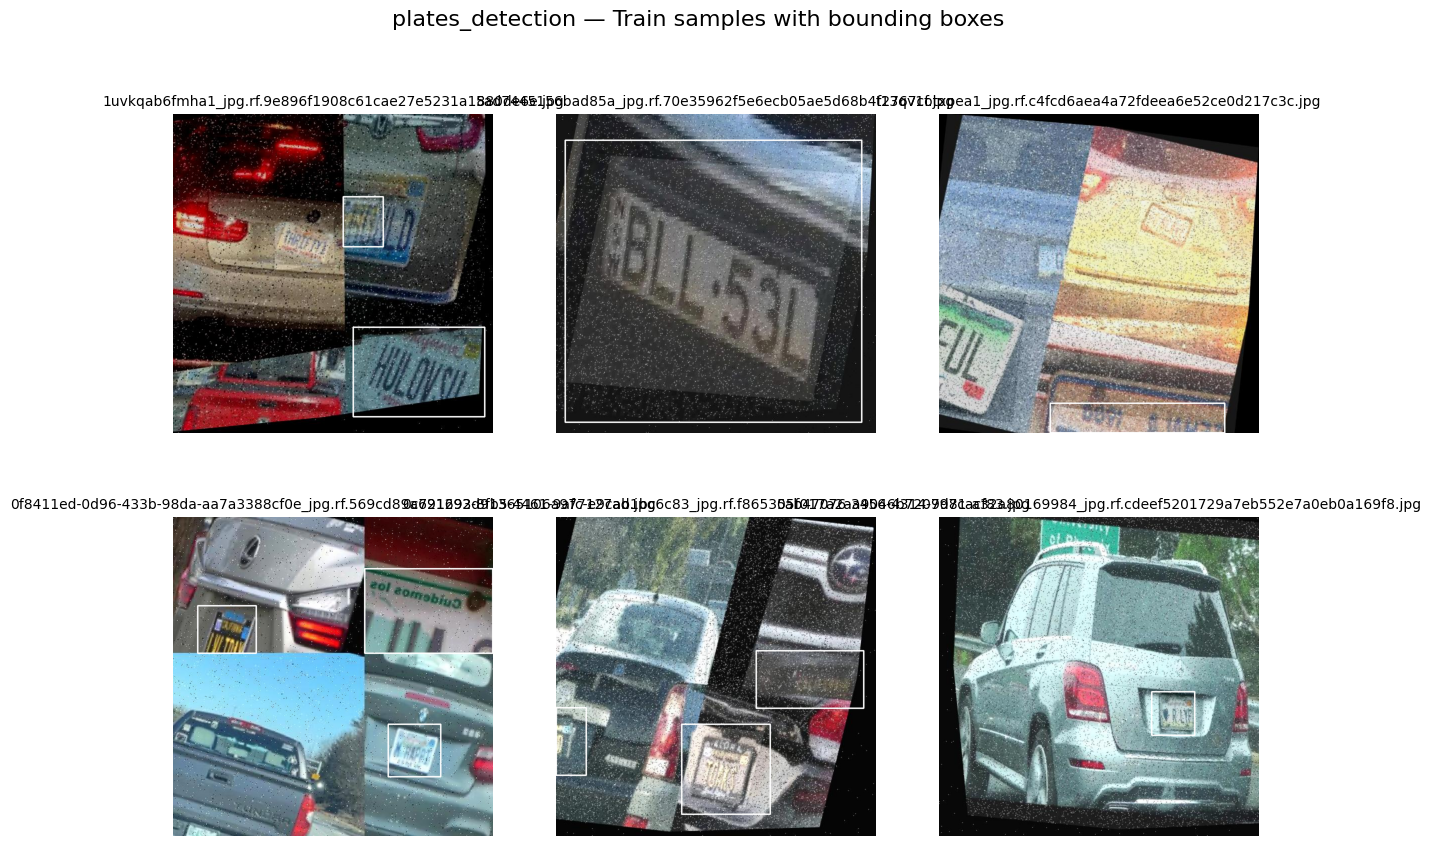

In [34]:
show_samples(
    dataset_root="/content/datasets/plates_detection",
    split="train",
    n=6,
    seed=7,
    title="plates_detection — Train samples with bounding boxes"
)


[saudi_cars | train] labels: 429, non-empty: 429


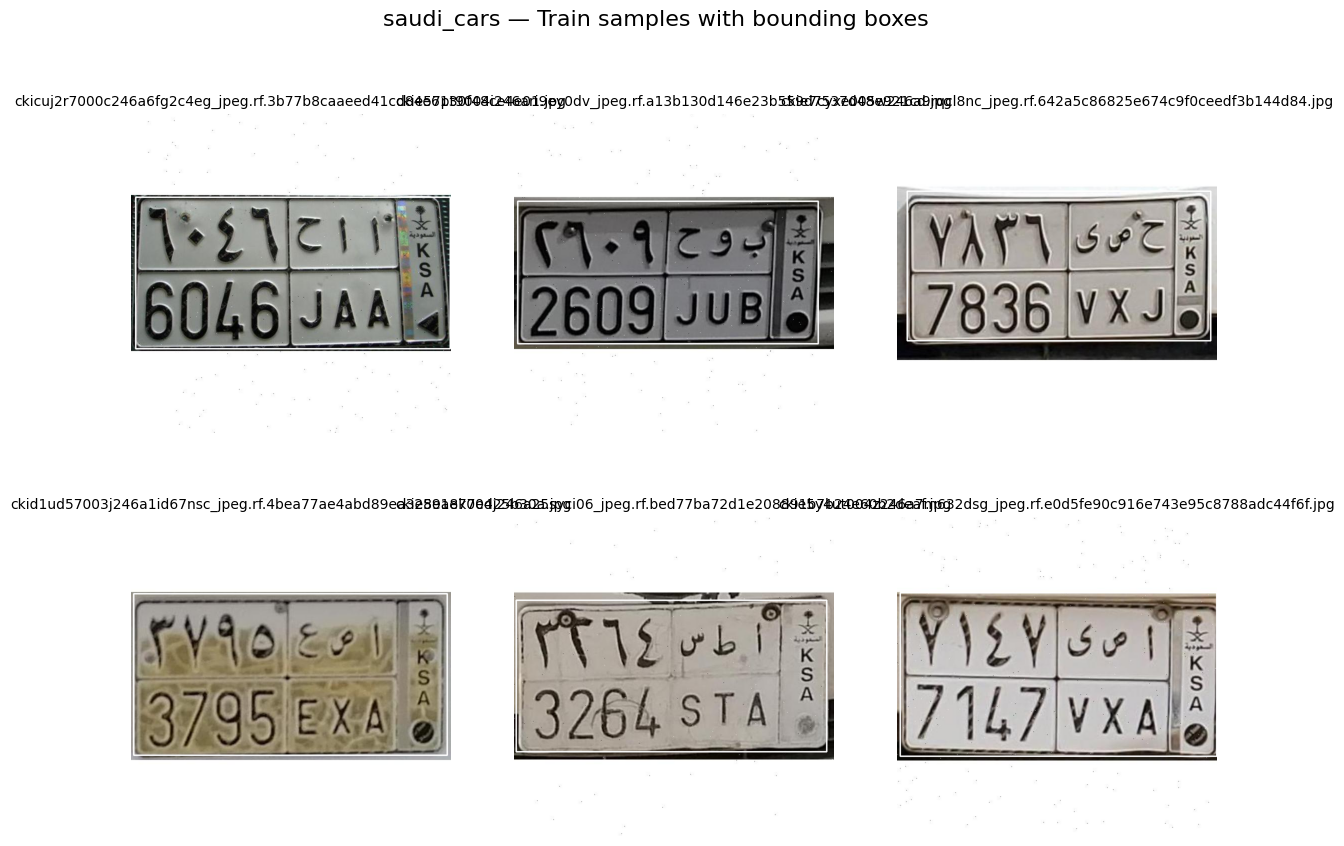

In [35]:
show_samples(
    dataset_root="/content/datasets/saudi_cars",
    split="train",
    n=6,
    seed=11,
    title="saudi_cars — Train samples with bounding boxes"
)


In [36]:
import glob, os

def label_stats(root):
    files = glob.glob(f"{root}/*/labels/*.txt")
    nonempty = sum(1 for f in files if os.path.getsize(f) > 0)
    empty = len(files) - nonempty
    return len(files), nonempty, empty

for ds in ["plates_detection", "saudi_cars"]:
    total, nonempty, empty = label_stats(f"/content/datasets/{ds}")
    print(ds, "label files:", total, "| non-empty:", nonempty, "| empty:", empty)


plates_detection label files: 3185 | non-empty: 3185 | empty: 0
saudi_cars label files: 484 | non-empty: 484 | empty: 0


In [37]:
print("plates_detection data.yaml:")
!cat /content/datasets/plates_detection/data.yaml
print("\nsaudi_cars data.yaml:")
!cat /content/datasets/saudi_cars/data.yaml


plates_detection data.yaml:
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: haeun-kim-ri91b
  project: license-plate-detection-wienp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/haeun-kim-ri91b/license-plate-detection-wienp/dataset/2

saudi_cars data.yaml:
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- LicensePlate
roboflow:
  workspace: my-projects-lcb5t
  project: license-plate-recognition-b09ny
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/my-projects-lcb5t/license-plate-recognition-b09ny/dataset/1


In [38]:
base_yaml = "/content/datasets/plates_detection/data.yaml"

model = YOLO("yolov8n.pt")   # small + fast baseline
model.train(
    data=base_yaml,
    epochs=30,
    imgsz=640,
    batch=16,
    device=0,
    name="stageA_base"
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/plates_detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=stageA_base, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a460fe6d7f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [39]:
model.val(data=base_yaml, split="test")

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 968.0±529.9 MB/s, size: 73.6 KB)
val: Scanning /content/datasets/plates_detection/test/labels... 112 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 112/112 2.4Kit/s 0.0s
val: New cache created: /content/datasets/plates_detection/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.4it/s 2.9s
                   all        112        143      0.959      0.888      0.906      0.663
Speed: 4.7ms preprocess, 5.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a47323020f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [45]:
metrics_base = model.val(data=base_yaml, split="test")


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1604.7±517.1 MB/s, size: 75.0 KB)
val: Scanning /content/datasets/plates_detection/test/labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 112/112 226.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.4it/s 2.9s
                   all        112        143      0.959      0.888      0.906      0.663
Speed: 5.5ms preprocess, 5.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/runs/detect/val3


In [40]:
saudi_yaml = "/content/datasets/saudi_cars/data.yaml"

ft = YOLO("runs/detect/stageA_base/weights/best.pt")
ft.train(
    data=saudi_yaml,
    epochs=20,
    imgsz=640,
    batch=16,
    lr0=1e-4,          # lower LR for fine-tuning
    device=0,
    name="stageB_saudi_finetune"
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/saudi_cars/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/stageA_base/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=stageB_saudi_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a464eb47b30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [41]:
ft.val(data=saudi_yaml, split="test")


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1224.0±429.7 MB/s, size: 30.1 KB)
val: Scanning /content/datasets/saudi_cars/test/labels... 12 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 12/12 2.0Kit/s 0.0s
val: New cache created: /content/datasets/saudi_cars/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.0it/s 0.5s
                   all         12         12      0.996          1      0.995      0.942
Speed: 1.7ms preprocess, 15.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a47322ea2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [46]:
metrics_ft   = ft.val(data=saudi_yaml, split="test")


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 699.7±277.6 MB/s, size: 30.6 KB)
val: Scanning /content/datasets/saudi_cars/test/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 12/12 8.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                   all         12         12      0.996          1      0.995      0.942
Speed: 1.5ms preprocess, 6.2ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to /content/runs/detect/val4


In [42]:
ft.predict(
    source="/content/datasets/saudi_cars/test/images",
    conf=0.25,
    save=True,
    name="pred_saudi_test"
)
print("Saved to: runs/detect/pred_saudi_test")



image 1/12 /content/datasets/saudi_cars/test/images/ckictycsy0002246ajt63dkm5_jpeg.rf.c2ed875c6558c3cedd5cb37a21349d2f.jpg: 640x640 1 LicensePlate, 15.7ms
image 2/12 /content/datasets/saudi_cars/test/images/ckicy4o3z0013246arqlvht46_jpeg.rf.10133b881b86b38f3ae773ecdc9d8edb.jpg: 640x640 1 LicensePlate, 7.3ms
image 3/12 /content/datasets/saudi_cars/test/images/ckicz6yqy001n246aes5gr98i_jpeg.rf.ffa4f4f1d48d478c5f8cef561544966e.jpg: 640x640 1 LicensePlate, 7.3ms
image 4/12 /content/datasets/saudi_cars/test/images/ckid1nct3003e246a2cvz7jzs_jpeg.rf.d2944b215d06bd8a3baaf252f70a50bb.jpg: 640x640 1 LicensePlate, 7.2ms
image 5/12 /content/datasets/saudi_cars/test/images/ckie3ty4n003o246adl0py653_jpeg.rf.46a89adca422f991fc94f33fa4705281.jpg: 640x640 1 LicensePlate, 7.4ms
image 6/12 /content/datasets/saudi_cars/test/images/ckie4tdaa0048246a0uuzadk9_jpeg.rf.ea9781ae3c5037477831d520cd9e7132.jpg: 640x640 1 LicensePlate, 7.2ms
image 7/12 /content/datasets/saudi_cars/test/images/ckie657f50054246au0cmh

In [47]:
mp, mr, map50, map5095 = metrics_base.box.mean_results()

print("\n=== Base Model Metrics ===")
print(f"mPrecision: {mp:.4f}")
print(f"mRecall:    {mr:.4f}")
print(f"mAP50:      {map50:.4f}")
print(f"mAP50-95:   {map5095:.4f}")


=== Base Model Metrics ===
mPrecision: 0.9586
mRecall:    0.8881
mAP50:      0.9059
mAP50-95:   0.6632


In [48]:
print("\n=== Fine-tuned Model Metrics ===")
print(f"mPrecision: {metrics_ft.box.mp:.4f}")
print(f"mRecall:    {metrics_ft.box.mr:.4f}")
print(f"mAP50:      {metrics_ft.box.map50:.4f}")
print(f"mAP50-95:   {metrics_ft.box.map:.4f}")


=== Fine-tuned Model Metrics ===
mPrecision: 0.9958
mRecall:    1.0000
mAP50:      0.9950
mAP50-95:   0.9422


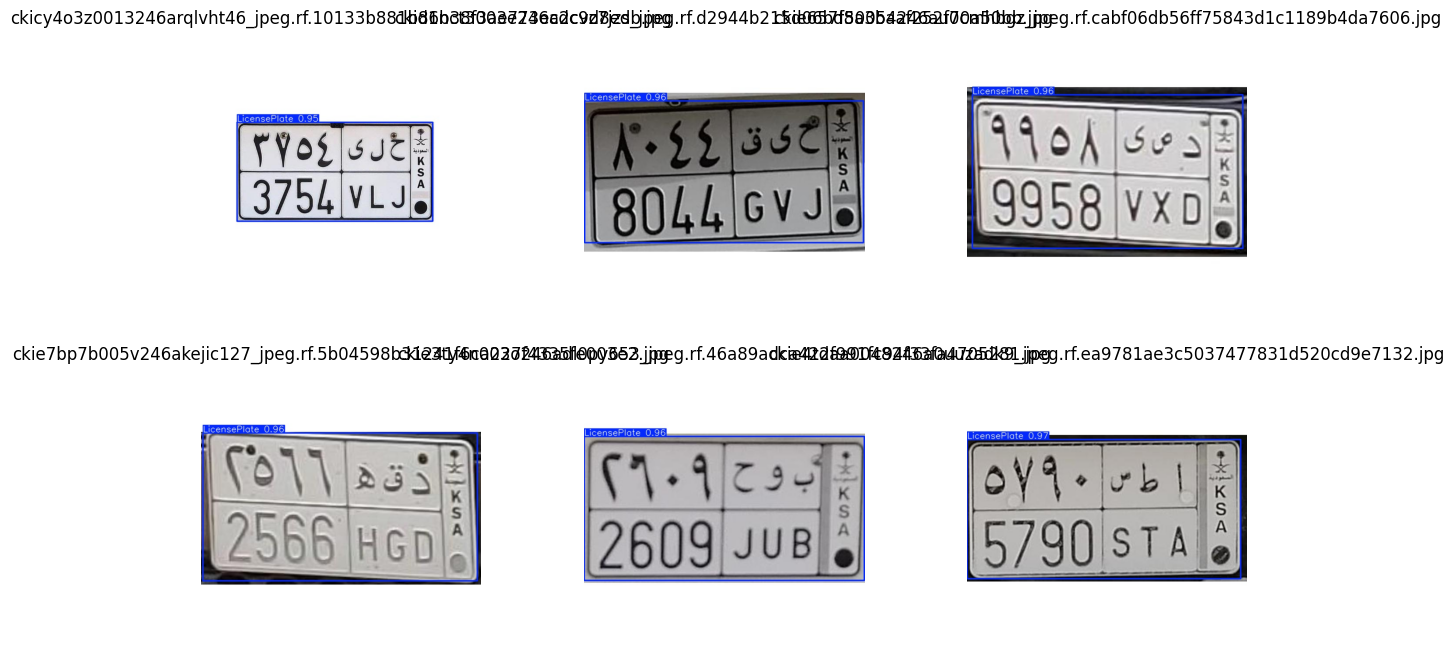

In [44]:
import glob, os, cv2
import matplotlib.pyplot as plt

pred_dir = "/content/runs/detect/pred_saudi_test"
imgs = glob.glob(os.path.join(pred_dir, "*.jpg"))[:6]

plt.figure(figsize=(14, 8))
for i, p in enumerate(imgs, 1):
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(p))
plt.show()


# (ANPR part): add OCR on detected crops will not pass to next phase as it is missing ground trouth

In [49]:
from ultralytics import YOLO
import os, glob, cv2

model = YOLO("runs/detect/stageB_saudi_finetune/weights/best.pt")

src_dir = "/content/datasets/saudi_cars/test/images"
out_dir = "/content/plate_crops_saudi_test"
os.makedirs(out_dir, exist_ok=True)

imgs = glob.glob(os.path.join(src_dir, "*"))
saved = 0

results = model.predict(source=imgs, conf=0.25, iou=0.5, verbose=False)

for r in results:
    img_path = r.path
    img = cv2.imread(img_path)
    if img is None:
        continue

    boxes = r.boxes.xyxy.cpu().numpy() if r.boxes is not None else []
    for j, (x1, y1, x2, y2) in enumerate(boxes):
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        crop = img[max(0,y1):max(0,y2), max(0,x1):max(0,x2)]
        if crop.size == 0:
            continue
        base = os.path.splitext(os.path.basename(img_path))[0]
        cv2.imwrite(os.path.join(out_dir, f"{base}_crop{j}.jpg"), crop)
        saved += 1

print("Saved plate crops:", saved)
print("Crops folder:", out_dir)


Saved plate crops: 12
Crops folder: /content/plate_crops_saudi_test


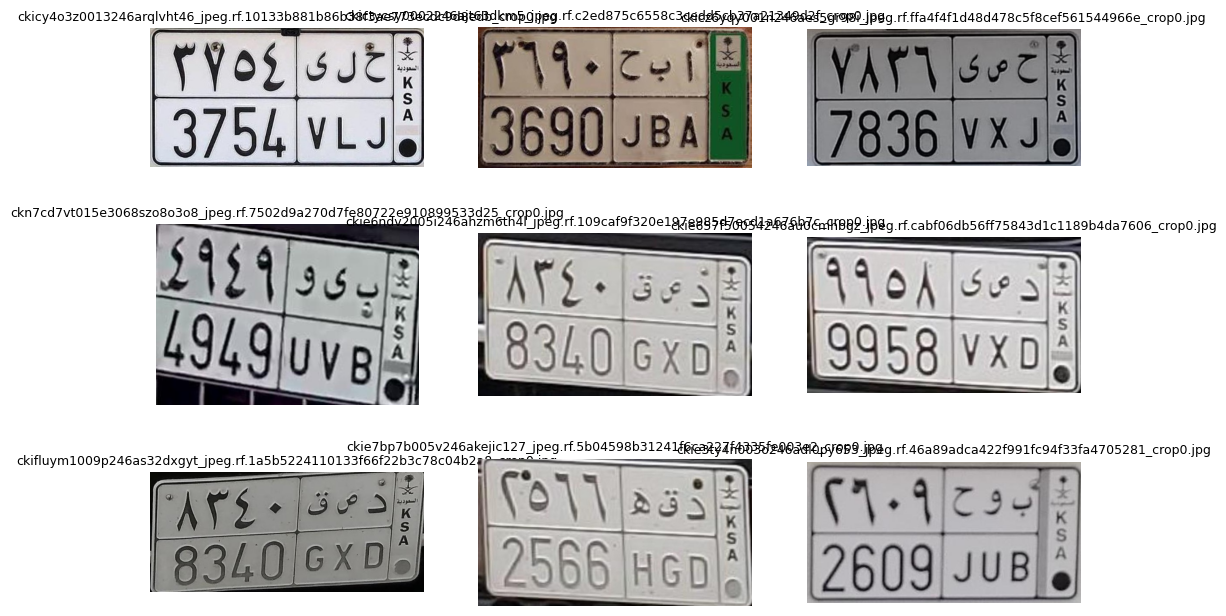

In [50]:
import matplotlib.pyplot as plt
import glob, os, cv2

crop_dir = "/content/plate_crops_saudi_test"
samples = glob.glob(os.path.join(crop_dir, "*.jpg"))[:9]

plt.figure(figsize=(12, 8))
for i, p in enumerate(samples, 1):
    img = cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(p), fontsize=9)
plt.show()


In [51]:
!pip -q install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 32.3 MB/s eta 0:00:00


In [52]:
import easyocr
import glob, os, re
import cv2

crop_dir = "/content/plate_crops_saudi_test"
crops = sorted(glob.glob(os.path.join(crop_dir, "*.jpg")))

reader = easyocr.Reader(['en'], gpu=True)  # set gpu=False if it errors

def clean_text(t: str) -> str:
    # keep only A-Z and 0-9
    t = t.upper()
    t = re.sub(r"[^A-Z0-9]", "", t)
    return t

ocr_results = []
for p in crops:
    img = cv2.imread(p)
    if img is None:
        continue

    # EasyOCR returns list of (bbox, text, conf)
    out = reader.readtext(img, detail=1)
    if len(out) == 0:
        best_text, best_conf = "", 0.0
    else:
        # pick highest confidence
        best = max(out, key=lambda x: x[2])
        best_text, best_conf = best[1], float(best[2])

    ocr_results.append({
        "file": os.path.basename(p),
        "raw_text": best_text,
        "clean_text": clean_text(best_text),
        "conf": best_conf
    })

print("OCR done on crops:", len(ocr_results))
print("Sample outputs:")
for r in ocr_results[:10]:
    print(r["file"], "->", r["raw_text"], "| clean:", r["clean_text"], "| conf:", round(r["conf"], 3))


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteOCR done on crops: 12
Sample outputs:
ckictycsy0002246ajt63dkm5_jpeg.rf.c2ed875c6558c3cedd5cb37a21349d2f_crop0.jpg -> A | clean: A | conf: 0.659
ckicy4o3z0013246arqlvht46_jpeg.rf.10133b881b86b38f3ae773ecdc9d8edb_crop0.jpg -> A | clean: A | conf: 1.0
ckicz6yqy001n246aes5gr98i_jpeg.rf.ffa4f4f1d48d478c5f8cef561544966e_crop0.jpg -> A | clean: A | conf: 1.0
ckid1nct3003e246a2cvz7jzs_jpeg.rf.d2944b215d06bd8a3baaf252f70a50bb_crop0.jpg -> A | clean: A | conf: 1.0
ckie3ty4n003o246adl0py653_jpeg.rf.46a89adca422f991fc94f33fa4705281_crop0.jpg -> JUB | clean: JUB | conf: 0.999
ckie4tdaa0048246a0uuzadk9_jpeg.rf.ea9781ae3c5037477831d520cd9e7132_crop0.jpg -> A | clean: A | conf: 1.0
ckie657f50054246au0cmhbgz_jpeg.rf.cabf06db56ff75843d1c1189b4da7606_crop0.jpg -> 9958 | clean: 9958 | conf: 0.999
ckie6ndv2005i246ahzm6th4l_jpeg.rf.109caf9f320e197e985d7ecd1a676b7c_crop0.jpg -> 8340GxD] | clean: 8340GXD | conf: 0.362
ckie7bp7b005v

In [53]:
import pandas as pd

df = pd.DataFrame(ocr_results)
csv_path = "/content/ocr_results_saudi_test.csv"
df.to_csv(csv_path, index=False)
print("Saved:", csv_path)
df.head()


Saved: /content/ocr_results_saudi_test.csv


file raw_text clean_text  \
0  ckictycsy0002246ajt63dkm5_jpeg.rf.c2ed875c6558...        A          A   
1  ckicy4o3z0013246arqlvht46_jpeg.rf.10133b881b86...        A          A   
2  ckicz6yqy001n246aes5gr98i_jpeg.rf.ffa4f4f1d48d...        A          A   
3  ckid1nct3003e246a2cvz7jzs_jpeg.rf.d2944b215d06...        A          A   
4  ckie3ty4n003o246adl0py653_jpeg.rf.46a89adca422...      JUB        JUB   

       conf  
0  0.659222  
1  0.999966  
2  0.999817  
3  0.999576  
4  0.999379

In [54]:
import glob, os

print("saudi_plates train sample:")
print([os.path.basename(x) for x in glob.glob("/content/datasets/saudi_plates/train/images/*")[:10]])


saudi_plates train sample:
['ckifk0r9c008k246adh7izqsv_jpeg.rf.761853db13eadf484b7125e1c9e67b69.jpg', 'ckicxd12u000n246awnhvd62f_jpeg.rf.d7e40d8ae8d2125c74d66fbafb132d23.jpg', 'car_83_jpg.rf.6854db3db9015d99d9a501d6b32e1942.jpg', 'car_5_jpg.rf.2808909a0d84a588005feb5b80d19939.jpg', 'ckid0upbn002s246a0fwgqsmb_jpeg.rf.570ed937e5ca26a513a99c9ebf2d39c0.jpg', 'ckicxvbyp000w246a0gvltjb6_jpeg.rf.ae6e21df2fb7119cc7bda88c3c9cf115.jpg', 'ckid0gu9c002i246a90xe99zp_jpeg.rf.60b140571fbc9ecbc9dcff577258d9fc.jpg', 'ckie9le91007a246aea9qjxi6_jpeg.rf.a26b43bf01d5569c73b9207f9aa5440c.jpg', 'ckicu4p9f0005246a6fsh626t_jpeg.rf.24151d1845272c1af8ce7db055aa4e09.jpg', 'ckiea2oi4007k246aioc0rrt4_jpeg.rf.d90b80259388053fe53f02abb252713b.jpg']


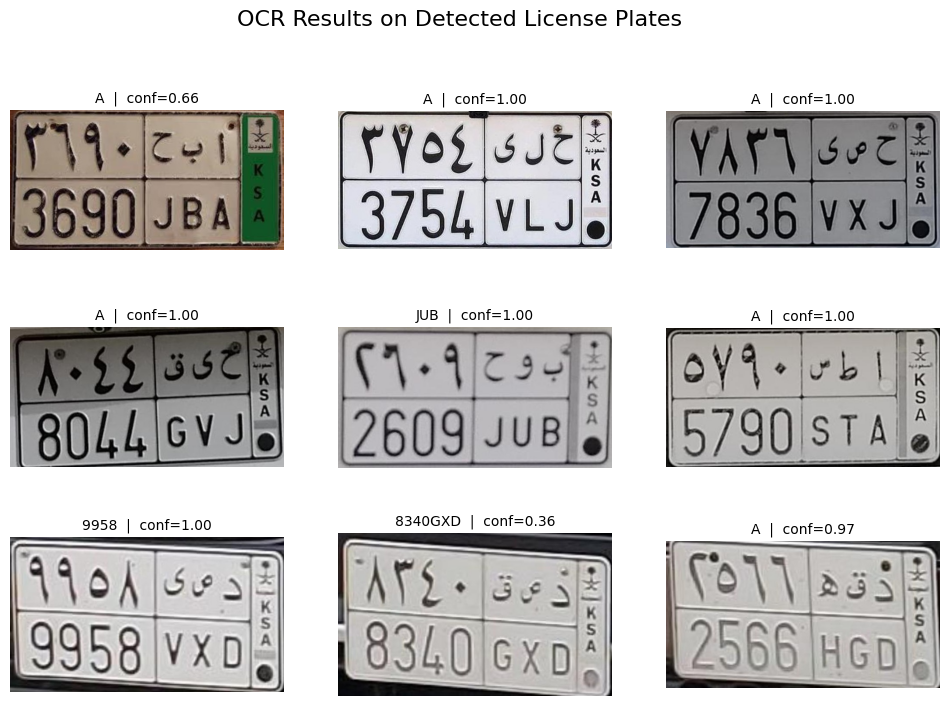

In [55]:
import easyocr
import cv2
import glob
import os
import re
import matplotlib.pyplot as plt

# Path to your cropped plates
CROP_DIR = "/content/plate_crops_saudi_test"
crops = sorted(glob.glob(os.path.join(CROP_DIR, "*.jpg")))[:9]

# OCR reader (English only)
reader = easyocr.Reader(['en'], gpu=True)

def clean_text(text):
    return re.sub(r"[^A-Z0-9]", "", text.upper())

plt.figure(figsize=(12, 8))

for i, img_path in enumerate(crops, 1):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = reader.readtext(img, detail=1)

    if results:
        best = max(results, key=lambda x: x[2])  # highest confidence
        text = clean_text(best[1])
        conf = best[2]
        title = f"{text}  |  conf={conf:.2f}"
    else:
        title = "NO TEXT  |  conf=0.00"

    plt.subplot(3, 3, i)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(title, fontsize=10)

plt.suptitle("OCR Results on Detected License Plates", fontsize=16)
plt.show()


# to switch the yolo to onnx so we can run it on production servers

In [56]:
!pip -q install ultralytics

In [57]:
from ultralytics import YOLO

pt_path = "runs/detect/stageB_saudi_finetune/weights/best.pt"
model = YOLO(pt_path)

# Export to ONNX
# Note: imgsz must match what you trained/used (usually 640)
exported = model.export(format="onnx", imgsz=640, opset=12, simplify=True)
print("Exported to:", exported)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/stageB_saudi_finetune/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 191ms
Prepared 6 packages in 6.13s
Installed 6 packages in 273ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.0
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.80

requirements: AutoUpdate success ✅ 7.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: star

model can be found in

pt_path = "runs/detect/stageB_saudi_finetune/weights/best.onnx"

In [59]:
!pip -q install onnxruntime
import onnxruntime as ort

sess = ort.InferenceSession("runs/detect/stageB_saudi_finetune/weights/best.onnx", providers=["CPUExecutionProvider"])
print("ONNX inputs:", [i.name for i in sess.get_inputs()])
print("ONNX outputs:", [o.name for o in sess.get_outputs()])

ONNX inputs: ['images']
ONNX outputs: ['output0']
